In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from collections import Counter

C:\Users\rayir\AppData\Local\Temp\ipykernel_22508\1564228325.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv(r'C:\Users\rayir\Desktop\Python Code\EDA-Practise\Data\Diwali Sales Data.csv',encoding='unicode_escape')

In [3]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [7]:
# check fill_rates for all features
def get_fill_rates(column):
    col_name = column.name
    fill_rate = column.notna().sum()/len(column) * 100
    return f'fill_rate = {fill_rate:.2f}'

In [8]:
fill_rates = df.apply(get_fill_rates,axis=0)
fill_rates

User_ID             fill_rate = 100.00
Cust_name           fill_rate = 100.00
Product_ID          fill_rate = 100.00
Gender              fill_rate = 100.00
Age Group           fill_rate = 100.00
Age                 fill_rate = 100.00
Marital_Status      fill_rate = 100.00
State               fill_rate = 100.00
Zone                fill_rate = 100.00
Occupation          fill_rate = 100.00
Product_Category    fill_rate = 100.00
Orders              fill_rate = 100.00
Amount               fill_rate = 99.89
Status                fill_rate = 0.00
unnamed1              fill_rate = 0.00
dtype: object

In [9]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [10]:
df['Amount'].describe()

count    11239.000000
mean      9453.610858
std       5222.355869
min        188.000000
25%       5443.000000
50%       8109.000000
75%      12675.000000
max      23952.000000
Name: Amount, dtype: float64

In [11]:
df.nunique()

User_ID             3755
Cust_name           1250
Product_ID          2351
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6584
Status                 0
unnamed1               0
dtype: int64

In [12]:
df['Age'].unique()
df['Marital_Status'].unique()
df['State'].unique()
df['Product_Category'].unique()
df['Orders'].unique()

array([28, 35, 16, 25, 61, 26, 34, 20, 46, 24, 48, 29, 54, 19, 30, 53, 83,
       33, 40, 39, 32, 36, 55, 27, 72, 45, 43, 47, 22, 52, 18, 21, 38, 37,
       23, 49, 42, 50, 31, 44, 41, 66, 15, 51, 77, 87, 79, 71, 88, 58, 82,
       62, 92, 12, 63, 17, 13, 67, 90, 56, 75, 81, 64, 73, 84, 14, 76, 86,
       89, 68, 91, 85, 70, 80, 65, 74, 69, 78, 57, 60, 59], dtype=int64)

array([0, 1], dtype=int64)

array(['Maharashtra', 'Andhra\xa0Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Madhya Pradesh',
       'Jharkhand', 'Kerala', 'Haryana', 'Bihar', 'Rajasthan',
       'Uttarakhand', 'Telangana', 'Punjab'], dtype=object)

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

array([1, 3, 2, 4], dtype=int64)

# Across Gender

In [13]:
df['Gender'].value_counts()

Gender
F    7842
M    3409
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

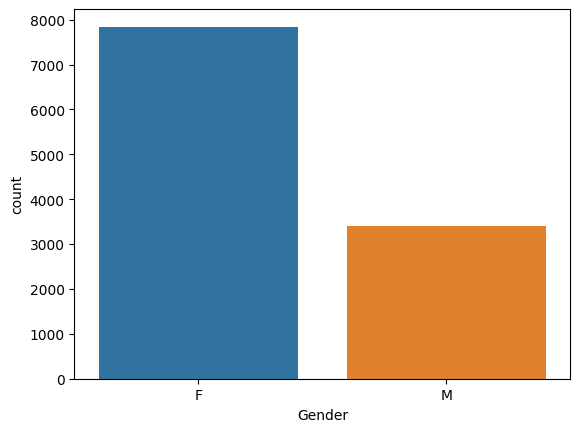

In [14]:
sns.countplot(data=df,x='Gender',hue='Gender')

In [15]:
df.groupby(by='Gender')['Amount'].sum().sort_values(axis=0,ascending=False)

Gender
F    74335856.43
M    31913276.00
Name: Amount, dtype: float64

<Axes: xlabel='Gender', ylabel='Amount'>

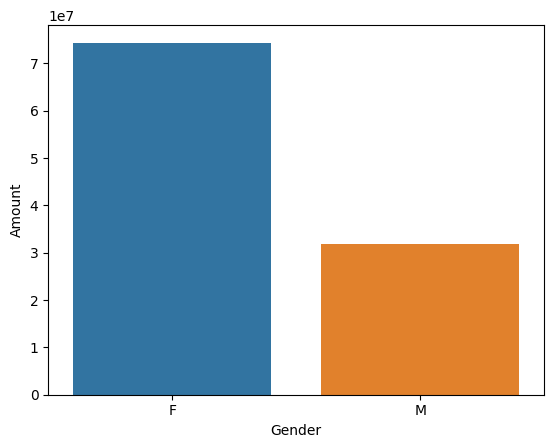

In [16]:
sns.barplot(data=df.groupby('Gender')['Amount'].sum().reset_index(),x='Gender',y='Amount',hue='Gender')

# Across Age Group

In [17]:
df['Age Group'].unique()

array(['26-35', '0-17', '18-25', '55+', '46-50', '51-55', '36-45'],
      dtype=object)

In [18]:
df['Age Group'].value_counts()


Age Group
26-35    4543
36-45    2286
18-25    1879
46-50     987
51-55     832
55+       428
0-17      296
Name: count, dtype: int64

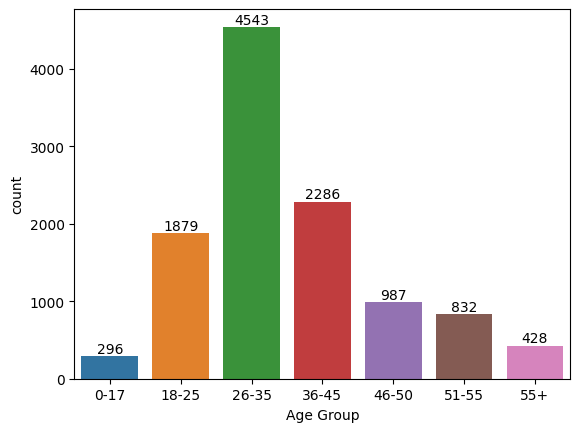

In [19]:
ax = sns.countplot(data=df['Age Group'].sort_values().reset_index(),x='Age Group',hue='Age Group')
for container in ax.containers:
    ax.bar_label(container)
plt.show();

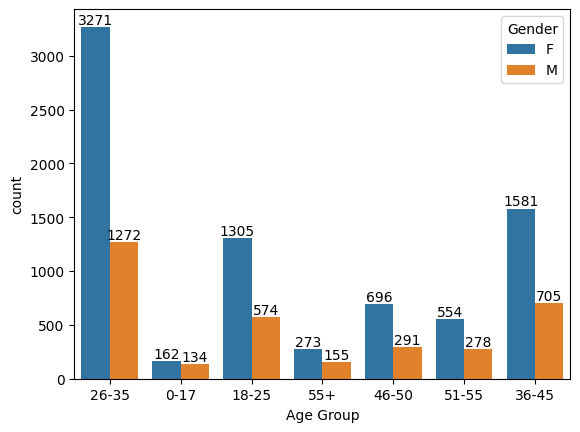

In [20]:
ax = sns.countplot(data=df,x='Age Group',hue='Gender')
for container in ax.containers:
    ax.bar_label(container)
plt.show();

<Axes: xlabel='Age Group', ylabel='Amount'>

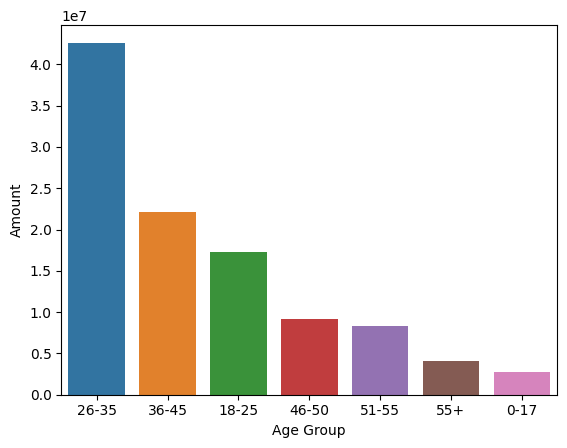

In [21]:
ax = sns.barplot(data=df.groupby('Age Group',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False),
            x='Age Group',y='Amount',hue='Age Group')
ax

# Across State

In [22]:
df['State'].nunique()
df['State'].unique()

16

array(['Maharashtra', 'Andhra\xa0Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Madhya Pradesh',
       'Jharkhand', 'Kerala', 'Haryana', 'Bihar', 'Rajasthan',
       'Uttarakhand', 'Telangana', 'Punjab'], dtype=object)

In [23]:
df['State'].value_counts()

State
Uttar Pradesh       1946
Maharashtra         1526
Karnataka           1305
Delhi               1107
Madhya Pradesh       923
Andhra Pradesh       812
Himachal Pradesh     608
Kerala               453
Haryana              452
Bihar                434
Gujarat              429
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: count, dtype: int64

In [24]:
df.groupby(by='State')['Orders'].sum().sort_values(ascending=False)

State
Uttar Pradesh       4813
Maharashtra         3811
Karnataka           3241
Delhi               2744
Madhya Pradesh      2259
Andhra Pradesh      2054
Himachal Pradesh    1568
Kerala              1137
Haryana             1109
Gujarat             1070
Bihar               1062
Jharkhand            953
Uttarakhand          824
Rajasthan            555
Punjab               495
Telangana            312
Name: Orders, dtype: int64

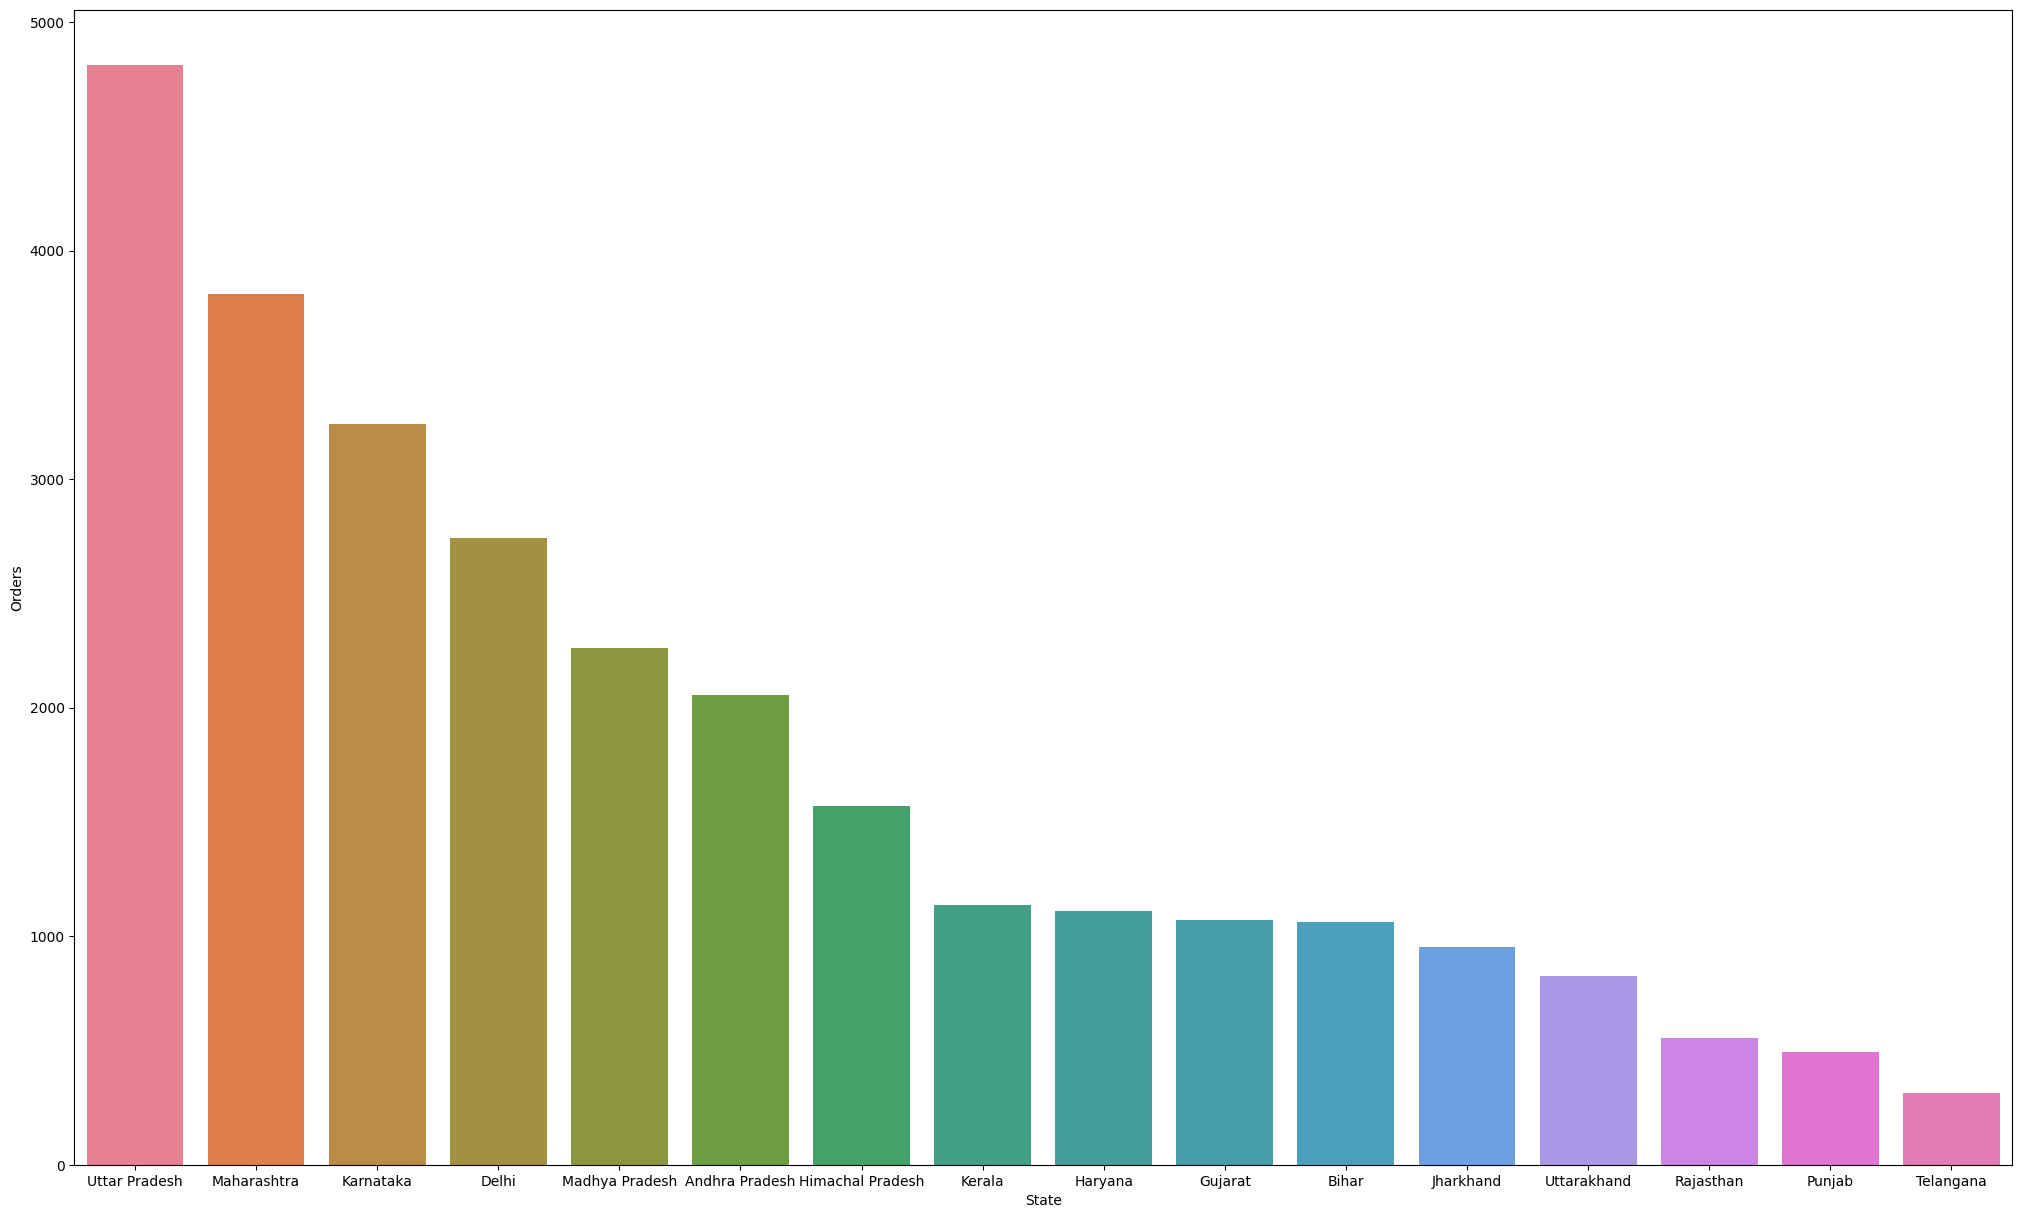

In [25]:
plt.figure(figsize=(25, 15))
sns.barplot(data=df.groupby('State', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False),
            x='State', y='Orders', hue='State')
plt.show();

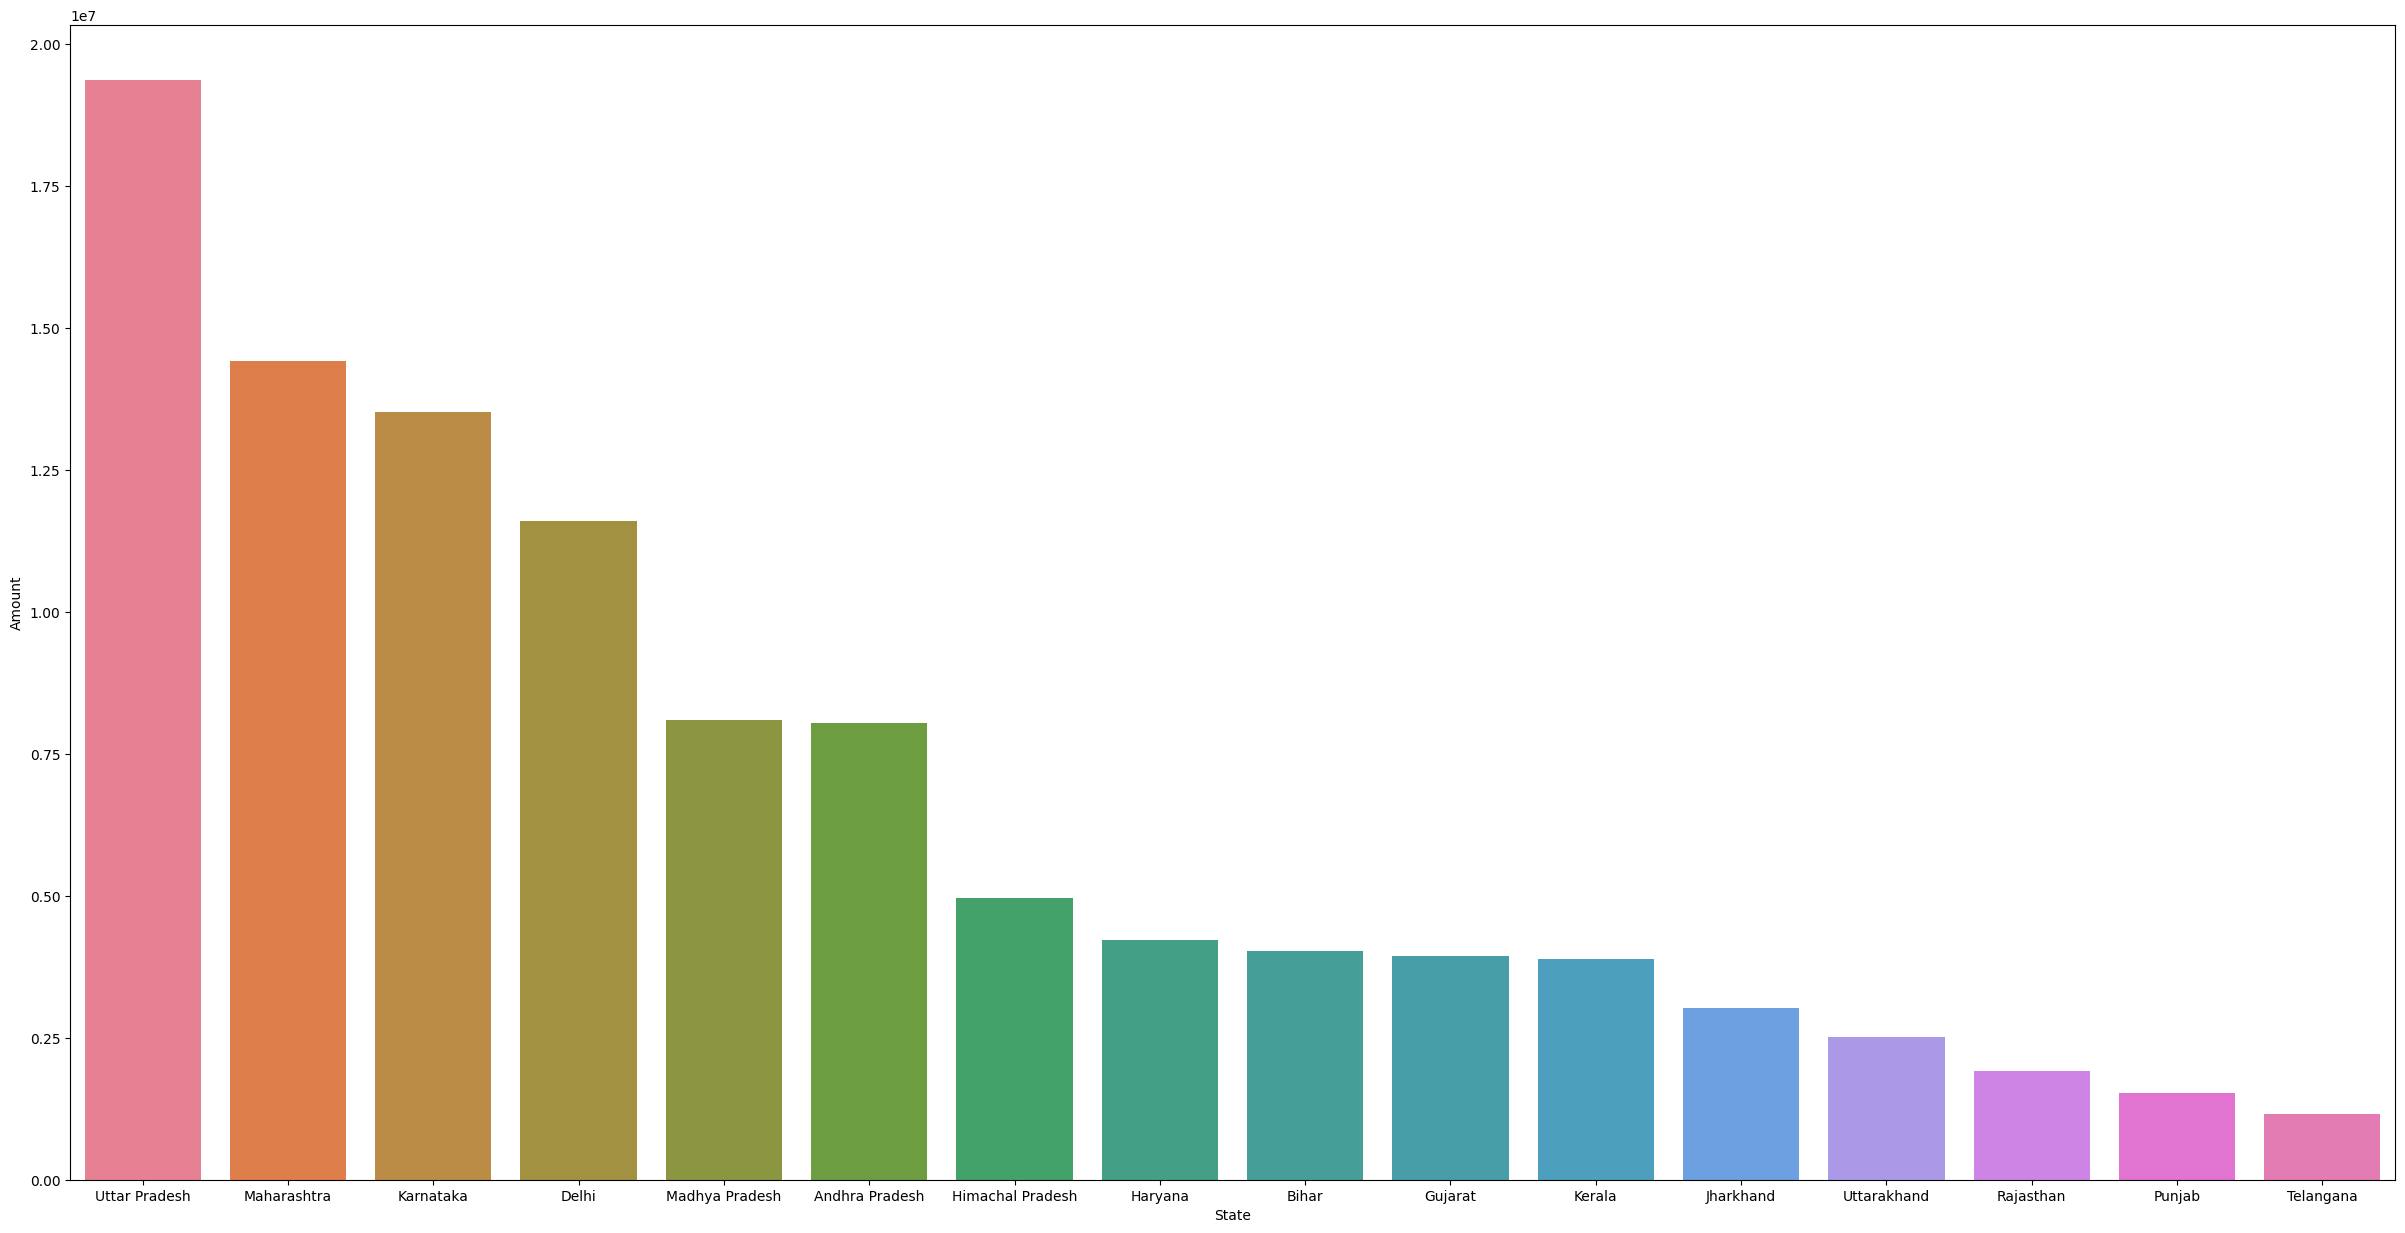

In [26]:
plt.figure(figsize=(30, 15))
ax = sns.barplot(data=df.groupby('State',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False),
                 x='State', y='Amount',hue='State')
plt.show();

# Maritial Status

In [27]:
df['Marital_Status'].nunique()
df['Marital_Status'].unique()

2

array([0, 1], dtype=int64)

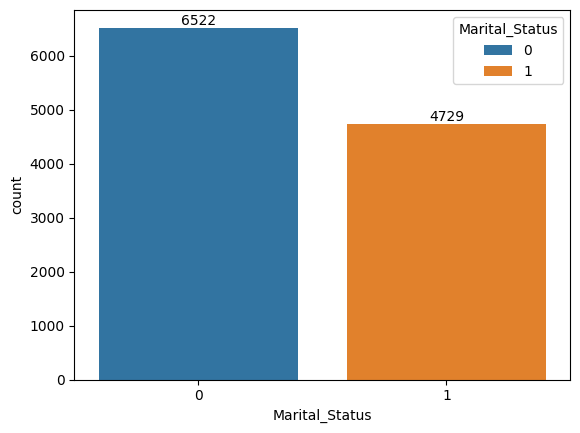

In [28]:
ax = sns.countplot(data=df,x='Marital_Status',hue='Marital_Status')
for container in ax.containers:
    ax.bar_label(container)
plt.show();

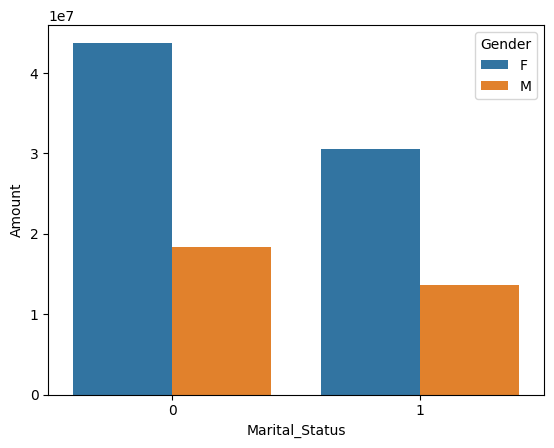

In [29]:
sns.barplot(data=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False),
            x='Marital_Status', y='Amount', hue='Gender')
plt.show();

# Across Occupation

In [30]:
df['Occupation'].value_counts()

Occupation
IT Sector          1588
Healthcare         1408
Aviation           1310
Banking            1139
Govt                854
Hospitality         705
Media               637
Automobile          566
Chemical            542
Lawyer              531
Retail              501
Food Processing     423
Construction        414
Textile             350
Agriculture         283
Name: count, dtype: int64

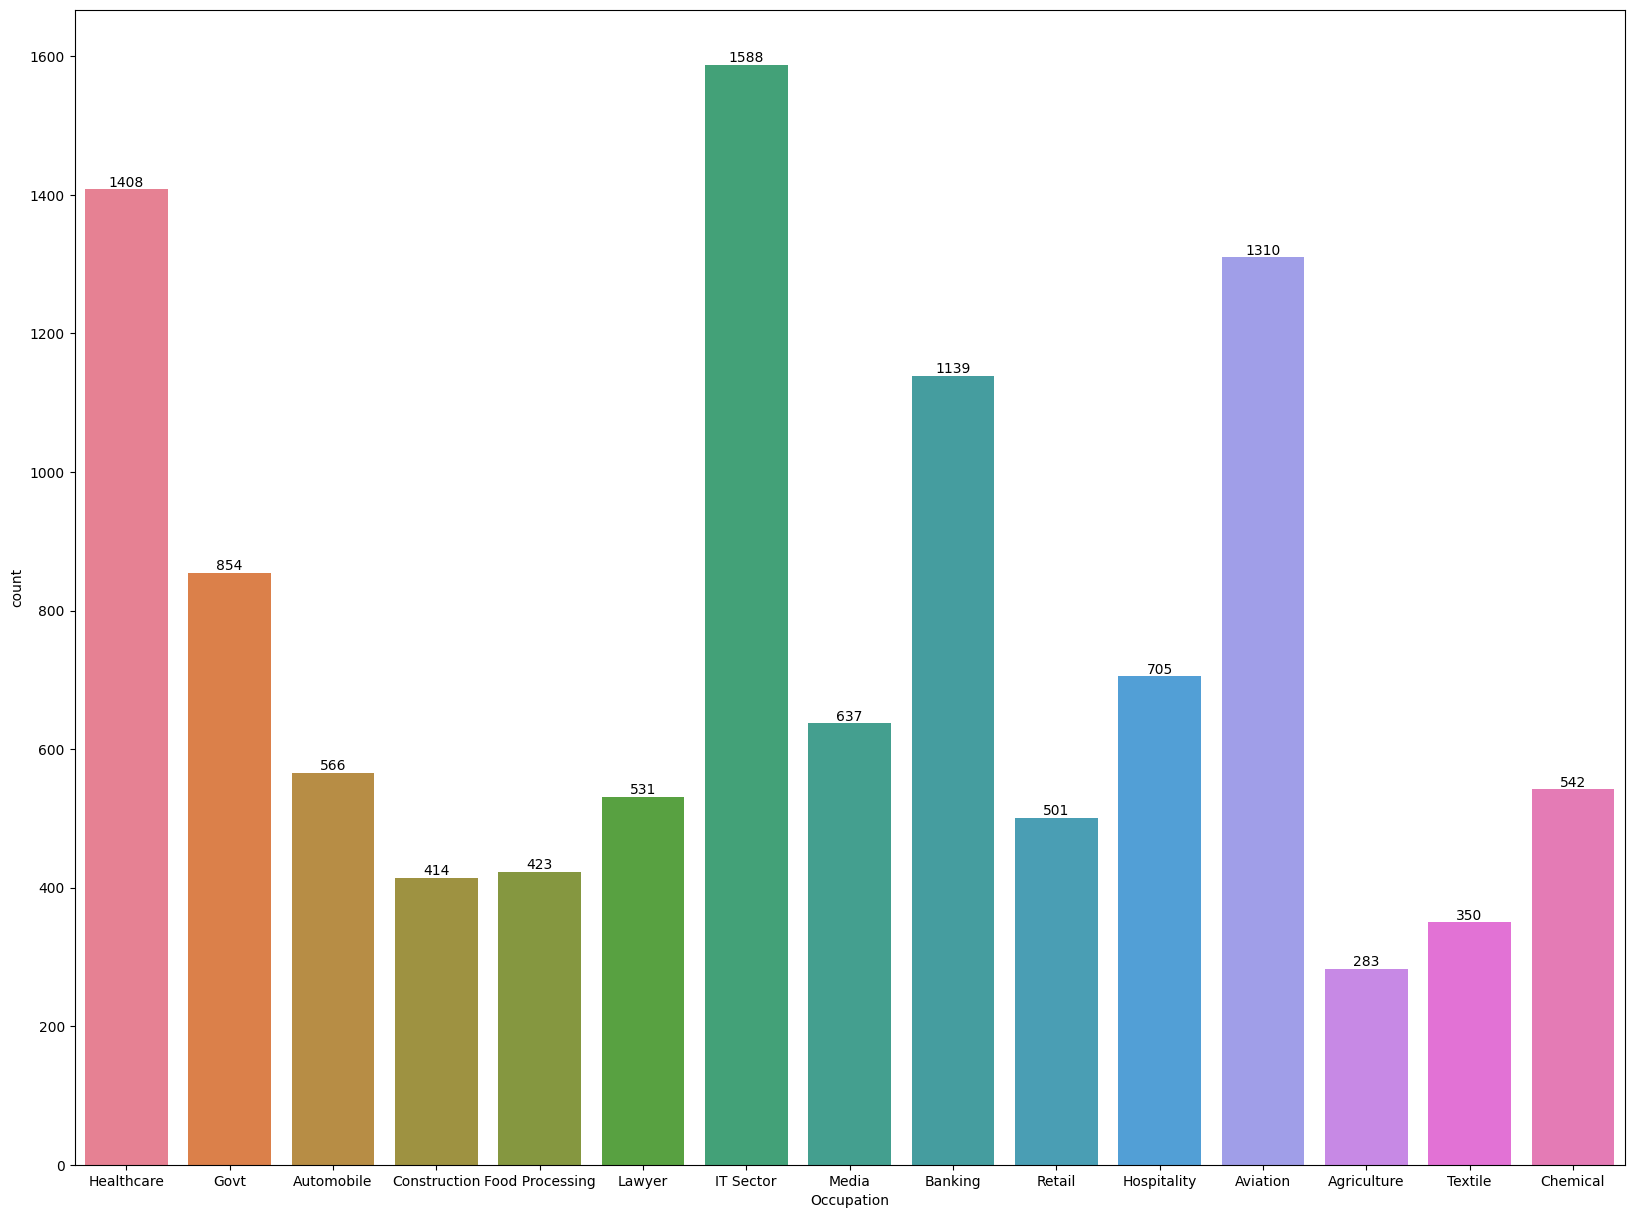

In [31]:
plt.figure(figsize=(20,15))
ax = sns.countplot(data=df, x='Occupation', hue='Occupation')
for container in ax.containers:
    ax.bar_label(container=container)
plt.show();

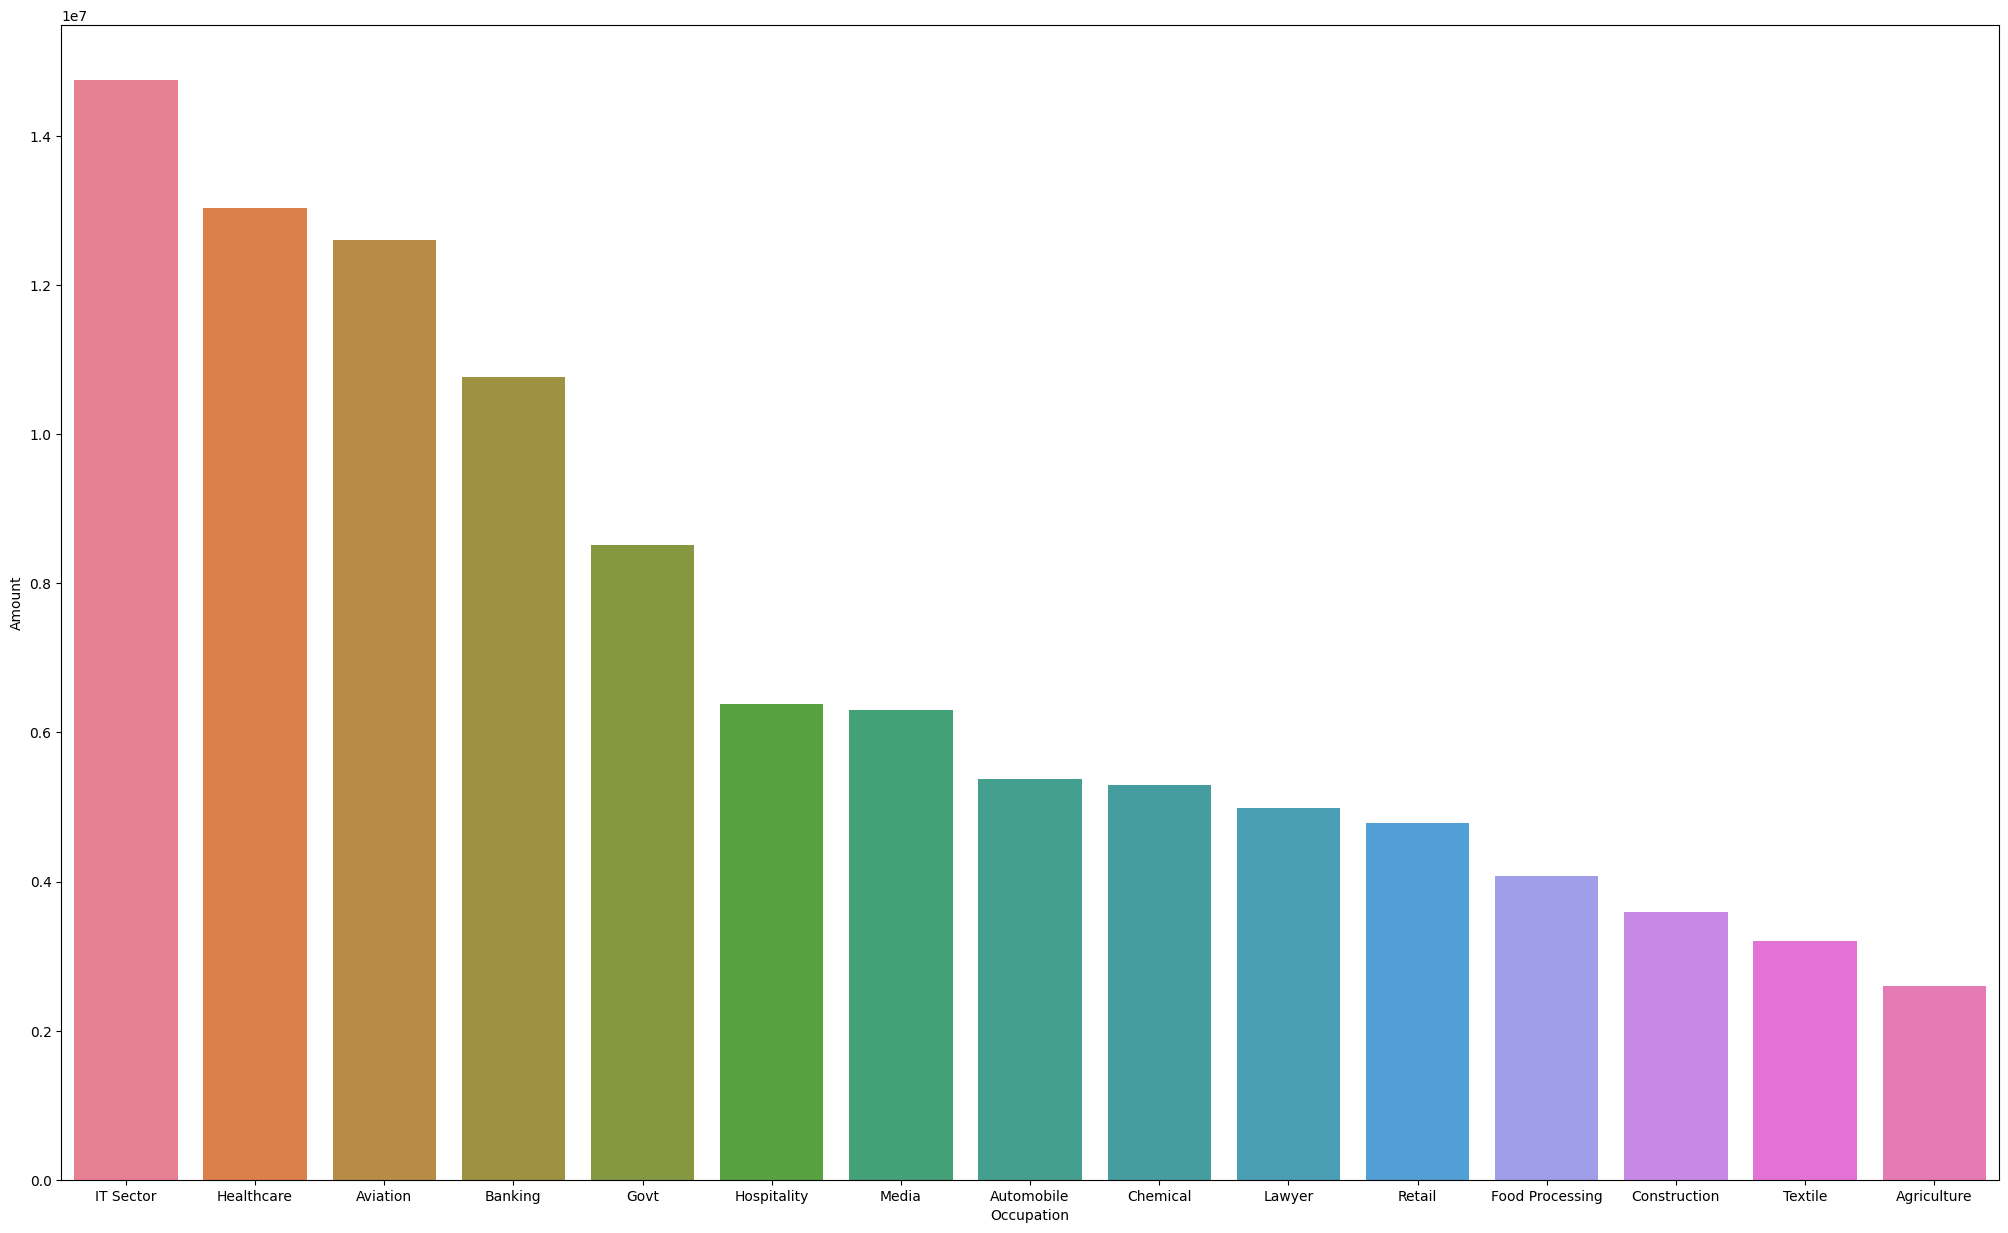

In [32]:
plt.figure(figsize=(25,15))
ax = sns.barplot(data=df.groupby('Occupation',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False),
                 x='Occupation',y='Amount',hue='Occupation')
plt.show();

# Across Product Category

In [33]:
df['Product_Category'].unique()
df['Product_Category'].nunique()

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

18

In [34]:
df['Product_Category'].value_counts()

Product_Category
Clothing & Apparel       2655
Food                     2493
Electronics & Gadgets    2087
Footwear & Shoes         1064
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 353
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                      100
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: count, dtype: int64

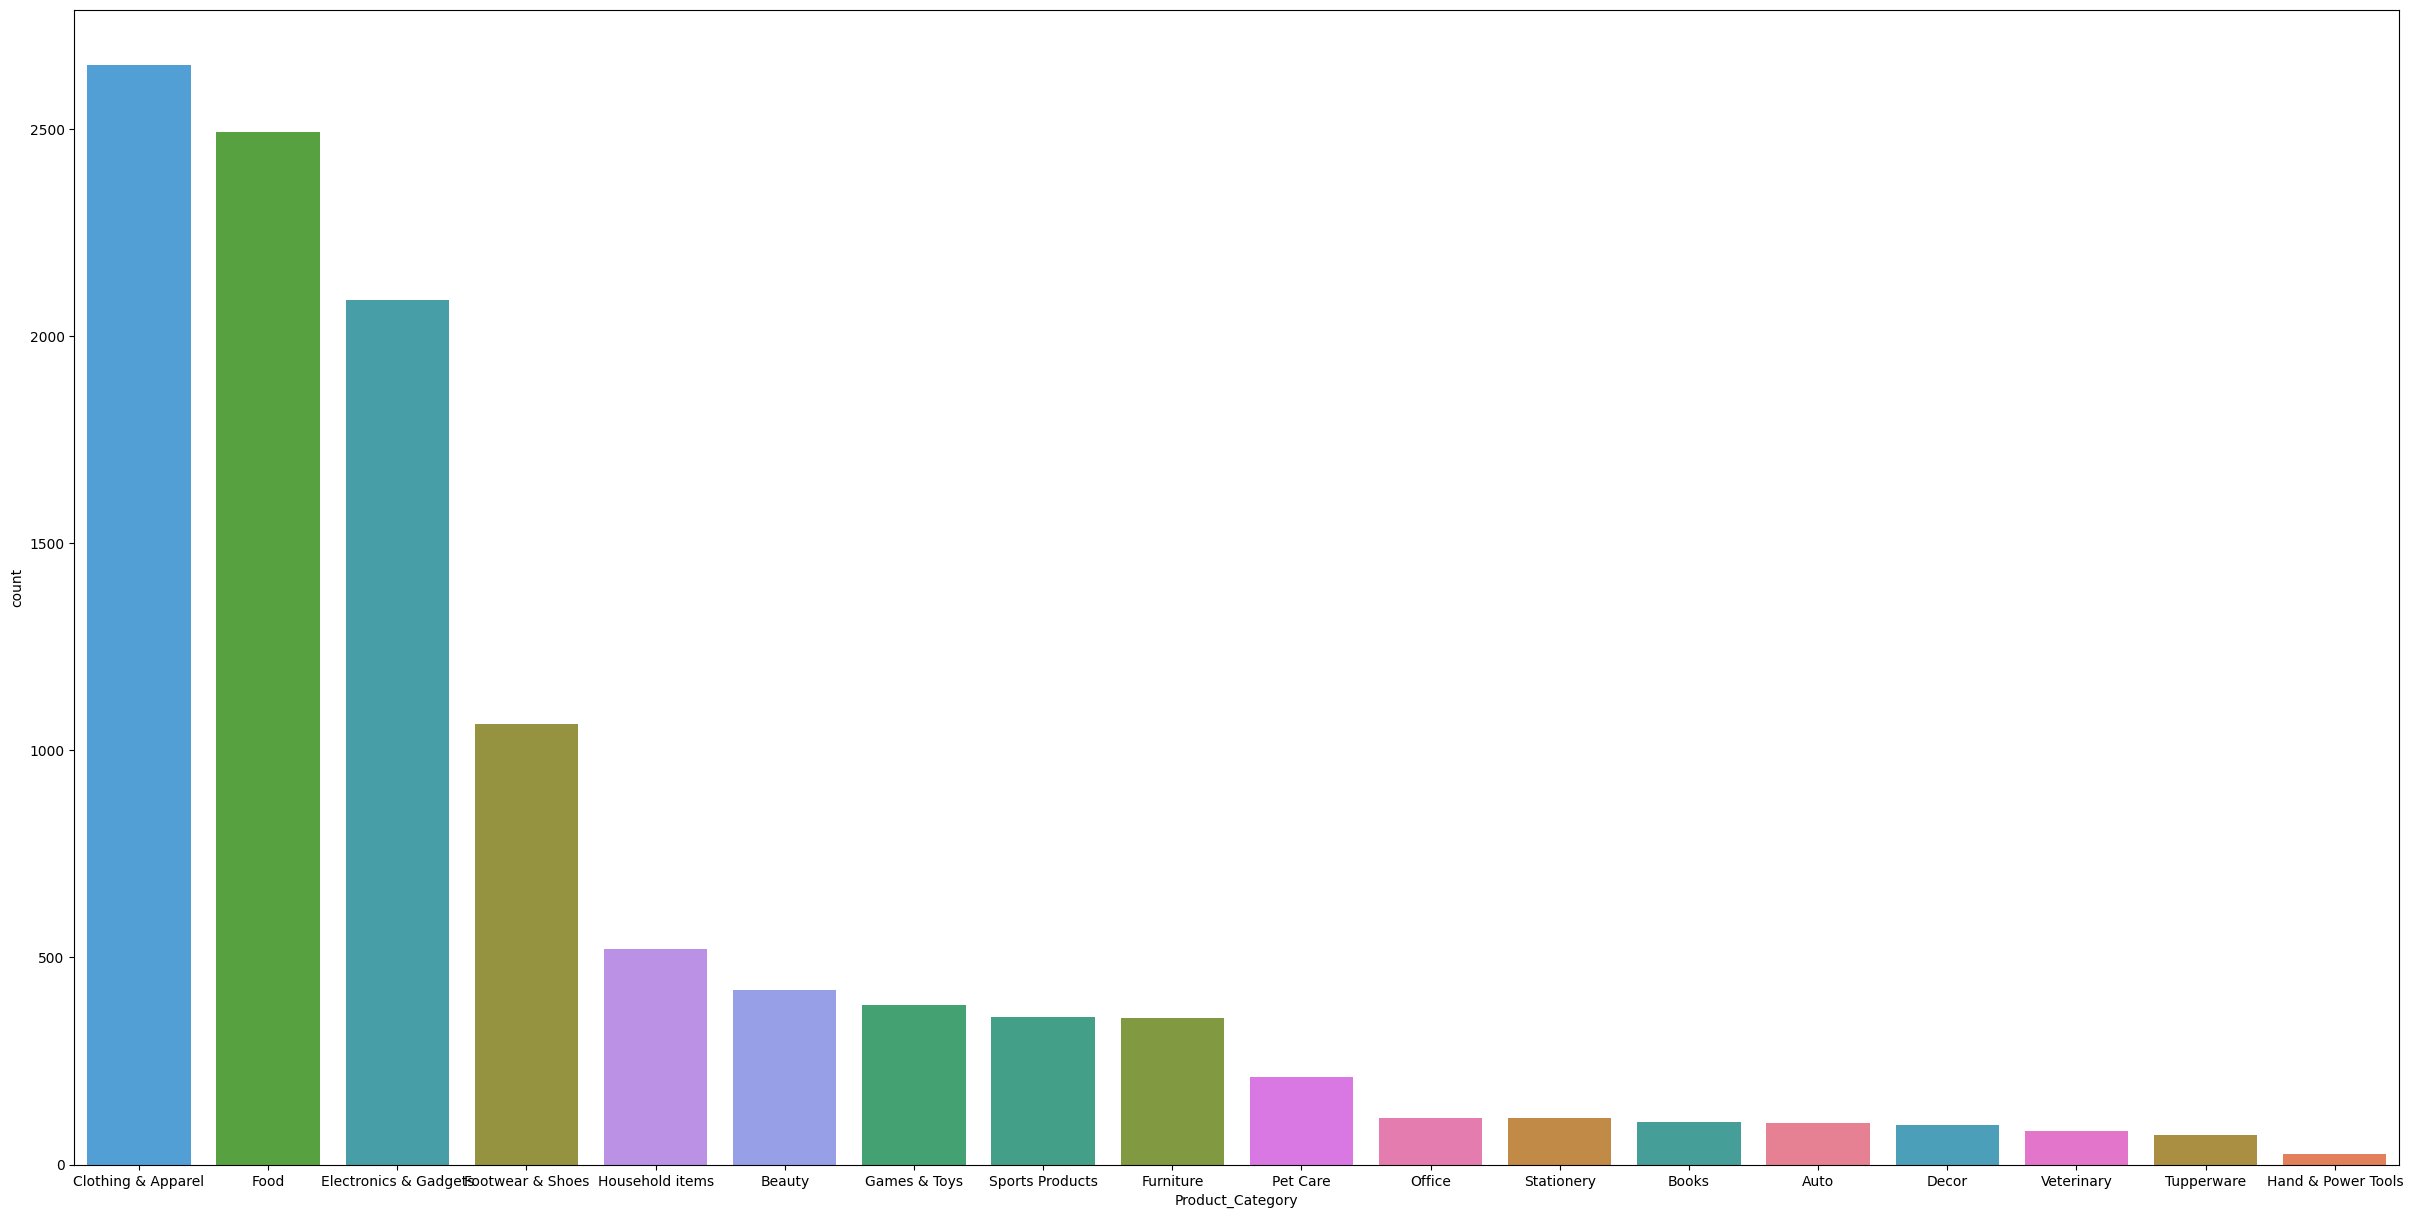

In [35]:
plt.figure(figsize=(30, 15))
ax = sns.countplot(data=df,
                   x='Product_Category', hue='Product_Category',order=df['Product_Category'].value_counts().index)
plt.show();

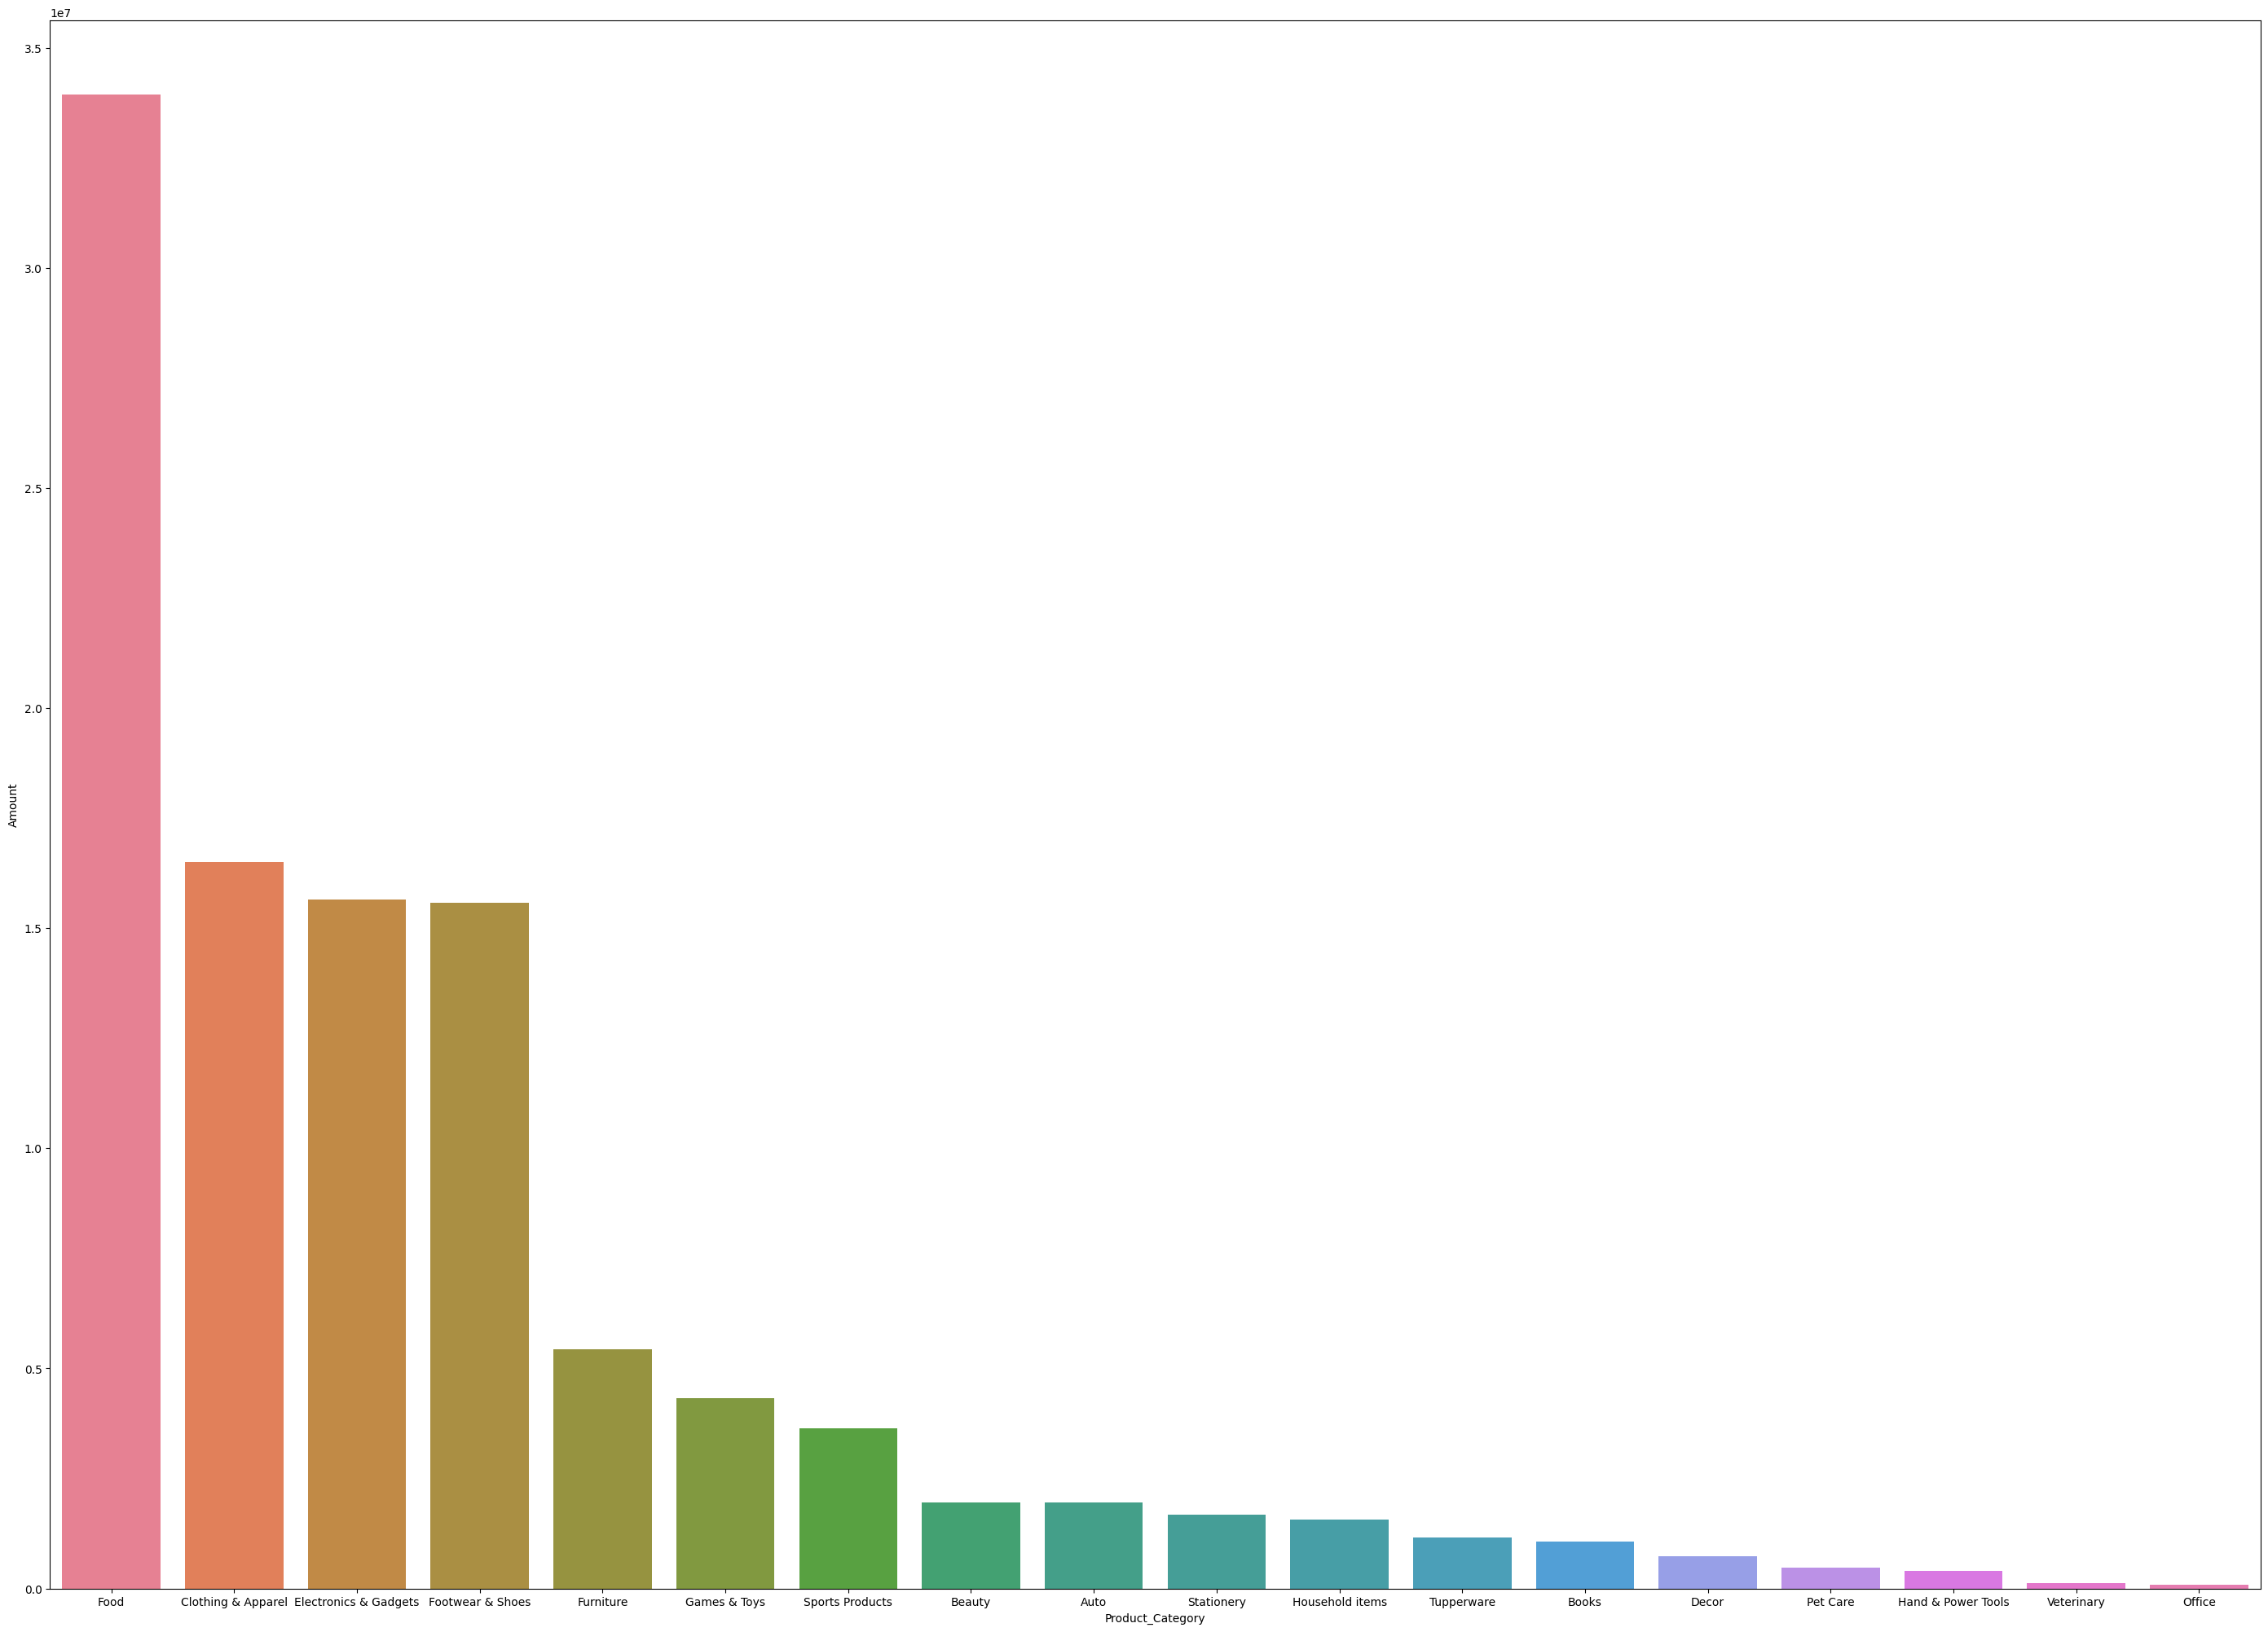

In [36]:
plt.figure(figsize=(35,25))
ax = sns.barplot(data=df.groupby('Product_Category',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False),
                 x='Product_Category',y='Amount',hue='Product_Category')
plt.show();

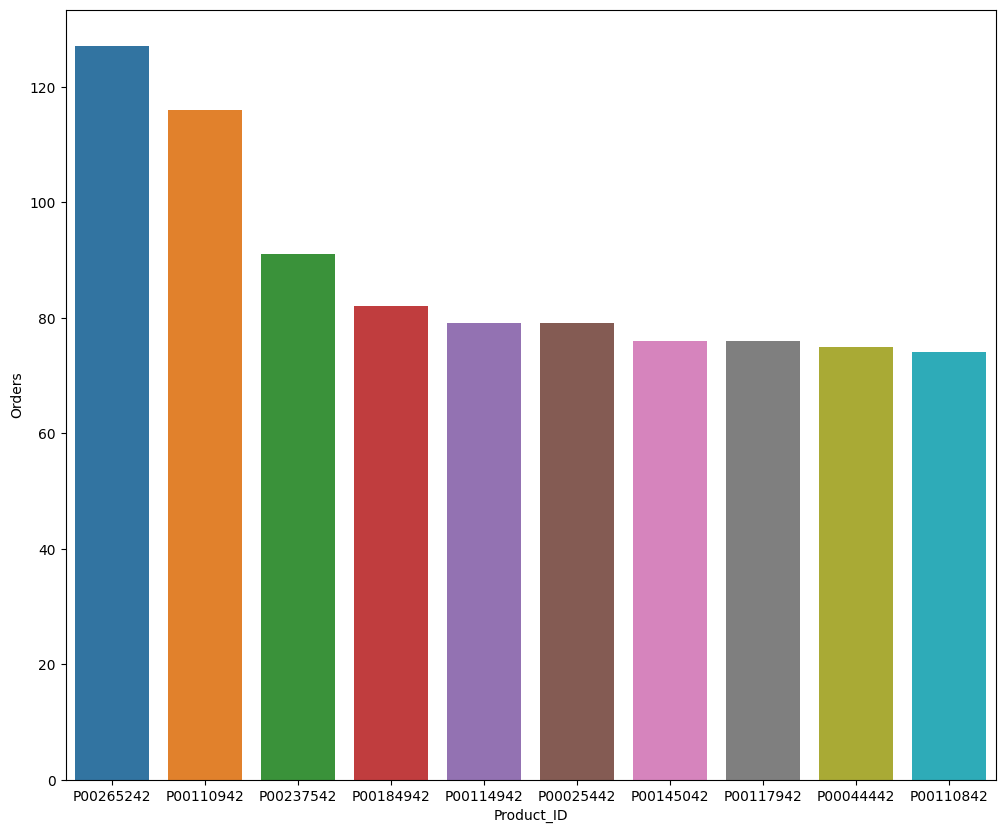

In [37]:
plt.figure(figsize=(12,10))
ax = sns.barplot(data=df.groupby('Product_ID',as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).nlargest(10, 'Orders'),
                   x='Product_ID', y='Orders', hue='Product_ID')
plt.show();

# Conclusion<br>

> 26-35 Age Group has been where sales has been most<br>
> Most number of orders came from Uttar Pradesh<br>
> Unmarried woman have more spendings than others<br>
> Most amount has been spent by those who work in IT Sector<br>
> Most amount has been spent on Food<br>
> Most Sold Product is P00265242